In [ ]:
#https://www.bilibili.com/read/cv12949609/

In [21]:
setwd('/import/DB/fel/BJTC-204')

In [22]:
library(CellChat)
library(patchwork)

In [23]:
cellchat.NL <- readRDS('./wt.cellchat.removedc.rds')
cellchat.LS <- readRDS('./ko.cellchat.removedc.rds')

In [24]:
cellchat.NL <- computeCommunProbPathway(cellchat.NL)
cellchat.NL <- netAnalysis_computeCentrality(cellchat.NL, slot.name = "netP")
cellchat.LS <- computeCommunProbPathway(cellchat.LS)
cellchat.LS <- netAnalysis_computeCentrality(cellchat.LS, slot.name = "netP")

In [25]:
cellchat.NL <- aggregateNet(cellchat.NL)
cellchat.LS <- aggregateNet(cellchat.LS)

In [26]:
object.list <- list(Con = cellchat.NL, MDD = cellchat.LS)
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



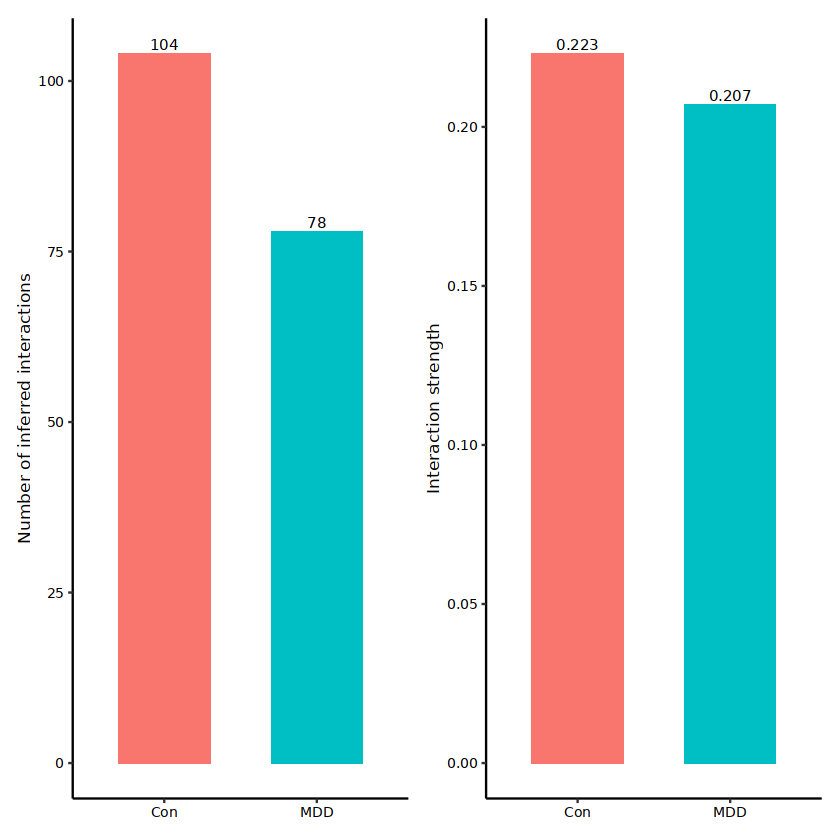

In [27]:
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), measure = "weight")
gg1 + gg2

In [28]:
ggsave(file = './sc.mye.cellchat1.pdf',height = 5,width = 6)

In [29]:
#

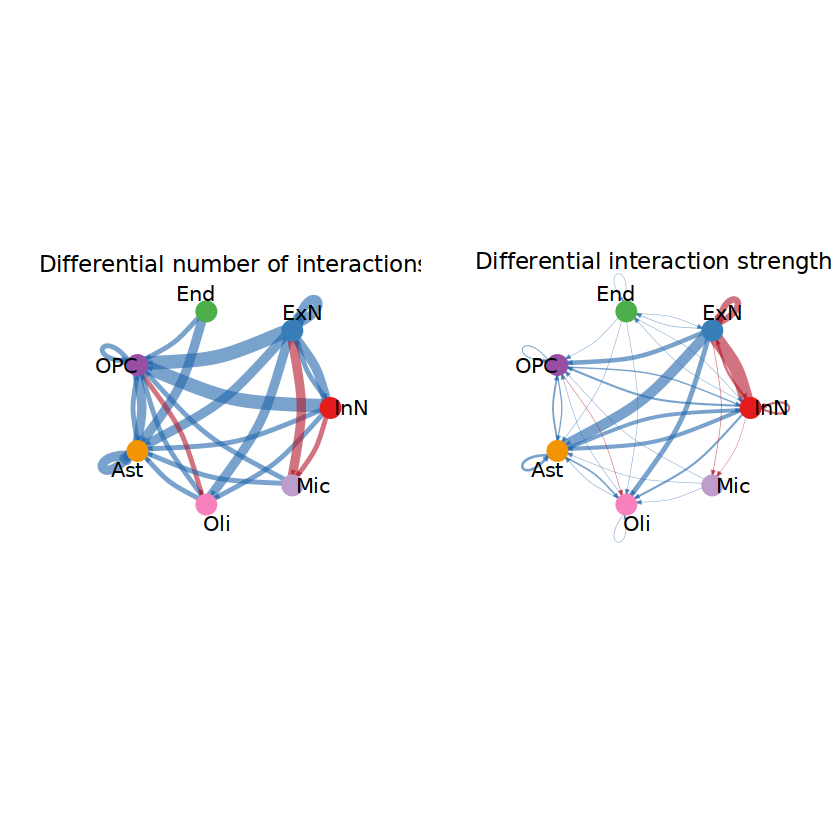

In [30]:
par(mfrow = c(1,2), xpd=TRUE)
p = netVisual_diffInteraction(cellchat, weight.scale = T)
p1 = netVisual_diffInteraction(cellchat, weight.scale = T, measure = "weight")

In [11]:
pdf('./sc.mye.cellchat2.pdf',height = 5,width = 10)
print(p )
dev.off()
pdf('./sc.mye.cellchat3.pdf',height = 5,width = 10)
print(p1 )
dev.off()

png 
  2

png 
  2

Do heatmap based on a merged object 




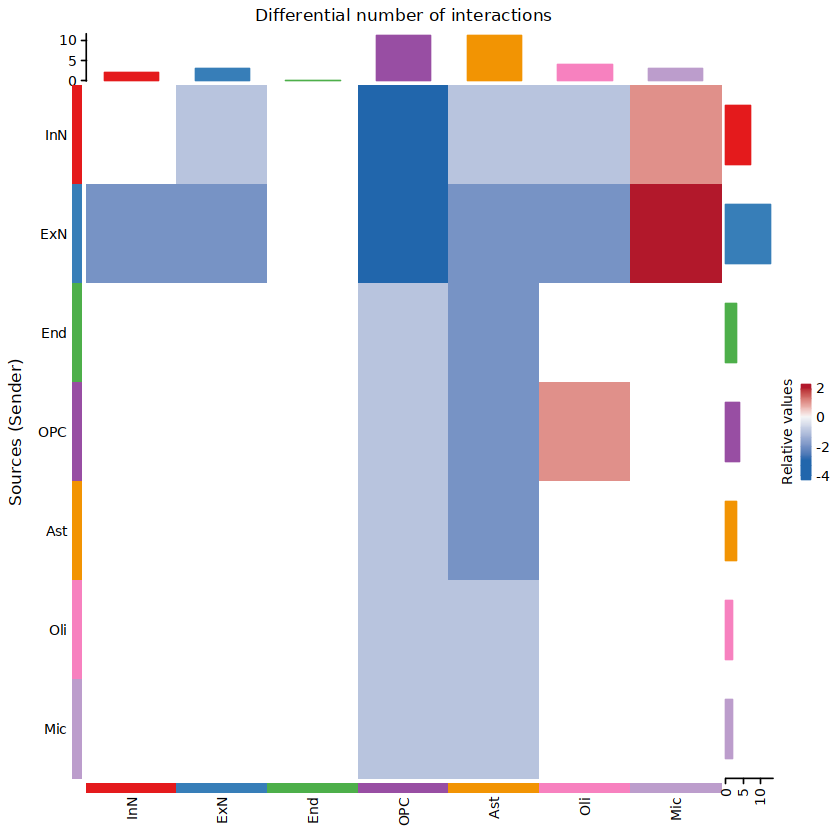

In [31]:
gg1 <- netVisual_heatmap(cellchat)
#> Do heatmap based on a merged object
#> Do heatmap based on a merged object
gg1 

Do heatmap based on a merged object 




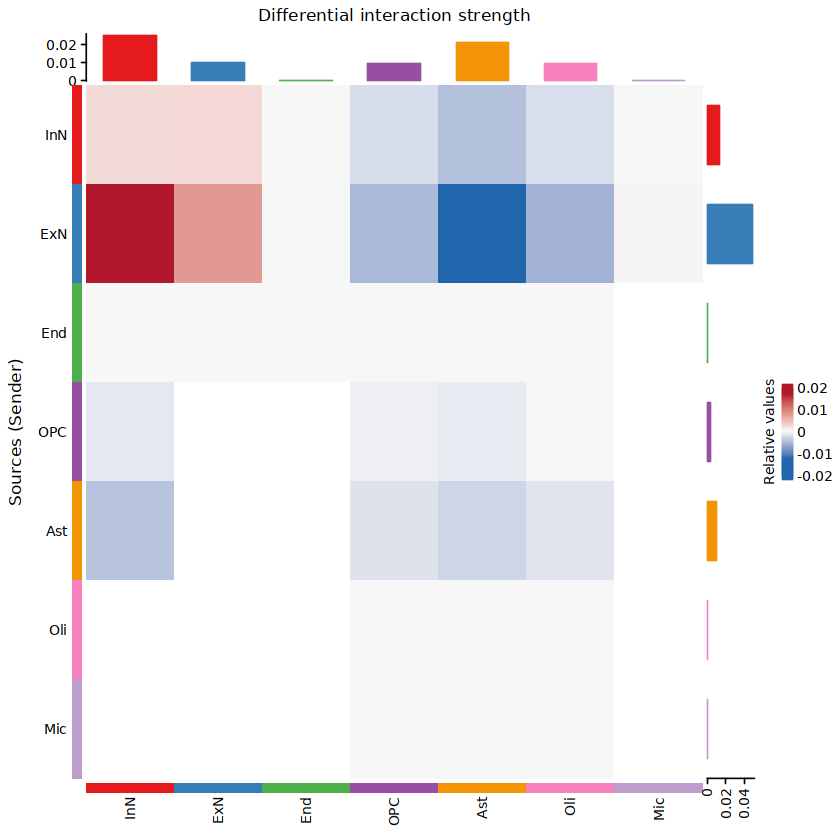

In [32]:
gg2 <- netVisual_heatmap(cellchat, measure = "weight")
gg2

In [15]:
pdf('./sc.mye.cellchat3.pdf',height = 5,width = 7)
print(gg1 )
dev.off()
pdf('./sc.mye.cellchat4.pdf',height = 5,width = 7)
print(gg2 )
dev.off()

png 
  2

png 
  2

In [33]:
options(repr.plot.width = 9,repr.plot.height = 6)

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



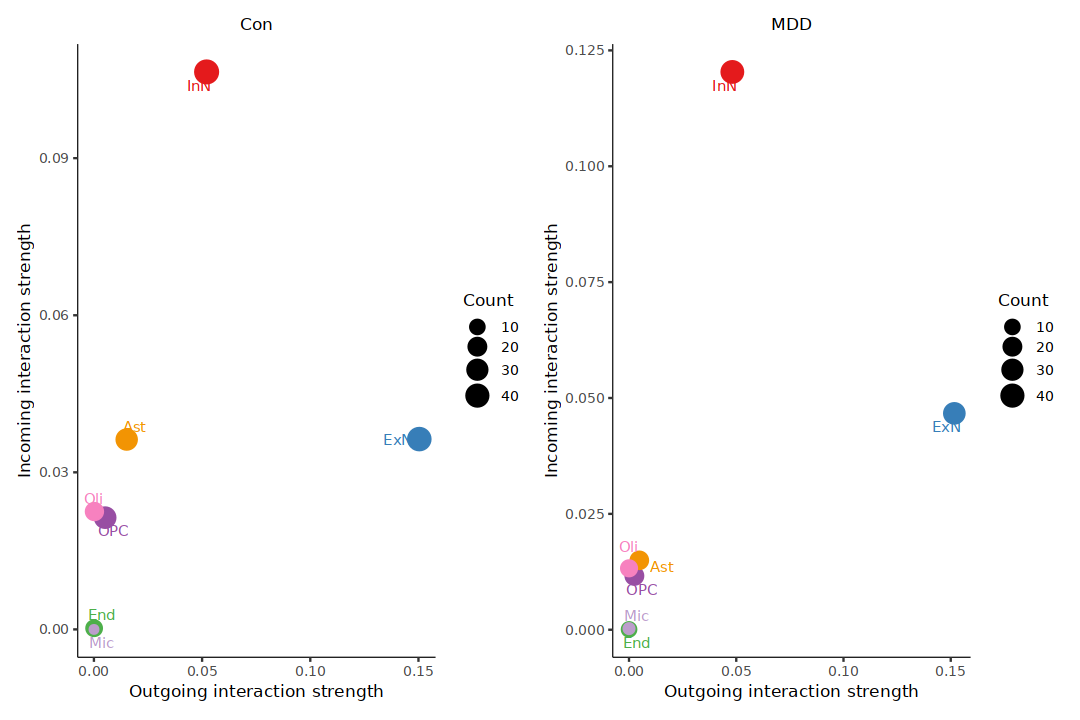

In [34]:
num.link <- sapply(object.list, function(x) {rowSums(x@net$count) + colSums(x@net$count)-diag(x@net$count)})

weight.MinMax <- c(min(num.link), max(num.link)) 
# 控制不同数据集中的气泡大小
gg <- list()
for (i in 1:length(object.list)) {
  gg[[i]] <- netAnalysis_signalingRole_scatter(object.list[[i]], title = names(object.list)[i], weight.MinMax = weight.MinMax)
}
#从所有信号通路分析聚合细胞-细胞通信网络的信号作用
patchwork::wrap_plots(plots = gg)

In [18]:
ggsave(file = './sc.mye.cellchat5.pdf',height = 5,width = 9)

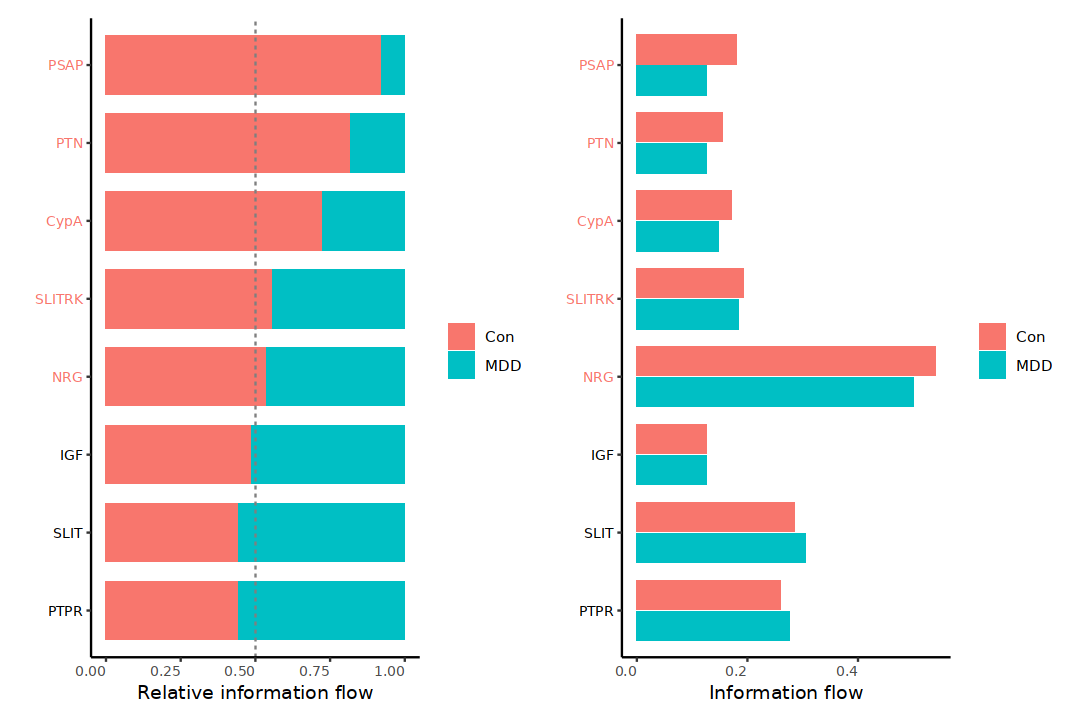

In [35]:
gg1 <- rankNet(cellchat, mode = "comparison", stacked = T, do.stat = TRUE)
gg2 <- rankNet(cellchat, mode = "comparison", stacked = F, do.stat = TRUE)
gg1 + gg2

In [20]:
#pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)

In [36]:
pathway.union = union(object.list[[1]]@netP$pathways,object.list[[2]]@netP$pathways)

In [37]:
ht1 = netAnalysis_signalingRole_heatmap(object.list[[1]], pattern = "all", signaling = pathway.union, title = names(object.list)[1], width = 5, height = 6, color.heatmap = "OrRd")

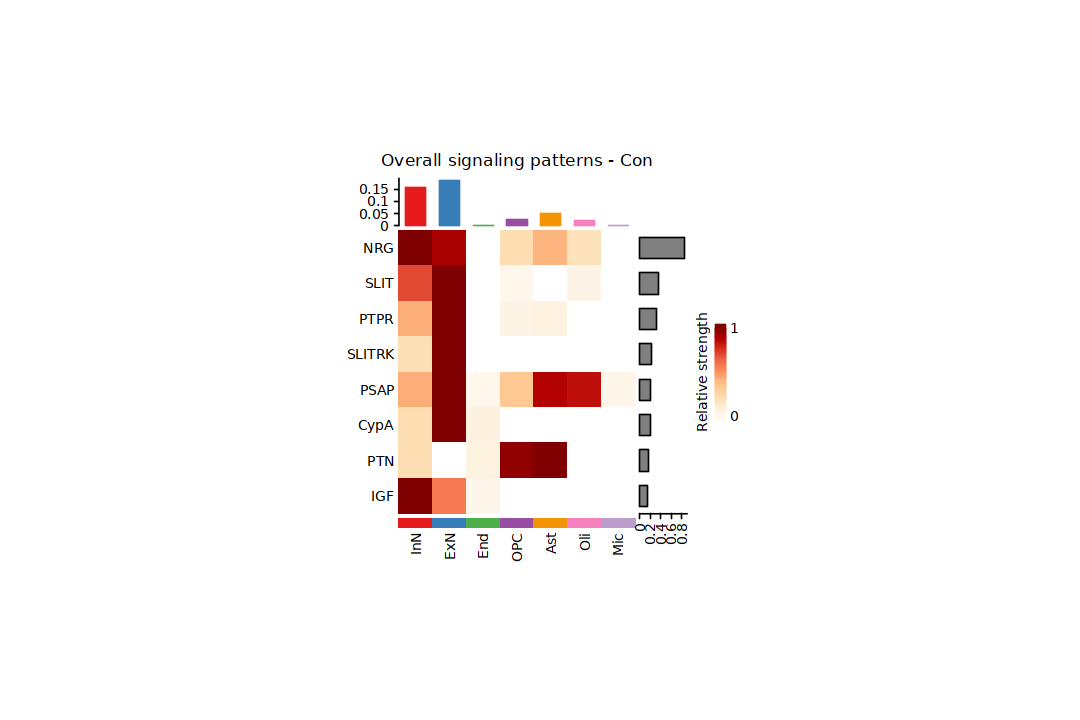

In [38]:
ht1

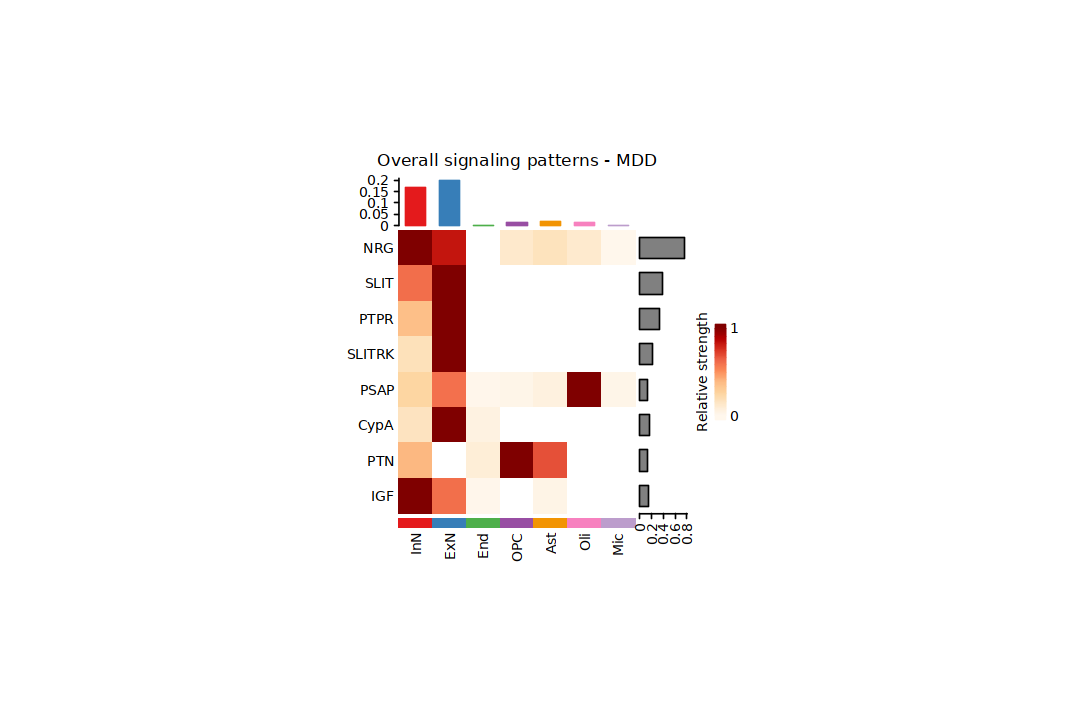

In [39]:
ht2 = netAnalysis_signalingRole_heatmap(object.list[[2]], pattern = "all", signaling = pathway.union, title = names(object.list)[2], width = 5, height = 6, color.heatmap = "OrRd")
ht2

In [27]:
# pdf('.sc.mye.cellchat6.pdf',width = 9,height = 5)
# pathways.show <- c("SPP1") 
# weight.max <- getMaxWeight(object.list, slot.name = c("netP"), attribute = pathways.show) 
# # 控制不同数据集的边的权重
# par(mfrow = c(1,2), xpd=TRUE)
# for (i in 1:length(object.list)) {
#   netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", edge.weight.max = weight.max[1], edge.width.max = 10, signaling.name = paste(pathways.show, names(object.list)[i]))
# }
# dev.off()

In [28]:
#ggsave(file = '../figure2/sc.mye.cellchat1-figure3.pdf',height = 5,width = 9)

In [29]:
options(repr.plot.width  =12,repr.plot.height = 6)

In [30]:
# par(mfrow = c(1, 2), xpd=TRUE)
# # compare all the interactions sending from Inflam.FIB to DC cells
# for (i in 1:length(object.list)) {
#   netVisual_chord_gene(object.list[[i]], sources.use = 6,targets.use =2 , lab.cex = 0.5, title.name = paste0("Signaling from SPP1.mac - ", names(object.list)[i]))
# }

In [ ]:
# netVisual_chord_gene(object.list[[2]], sources.use = 6,title.name = paste0("Signaling from SPP1.mac - ", names(object.list)[2]),
#                      targets.use = c(2), lab.cex = 0.5,legend.pos.y = 20)

In [ ]:
# pdf('../figure2/sc.mye.cellchat1-figure4.pdf',height = 8,width = 8)
# print(p)
# dev.off()

In [ ]:
# netVisual_chord_gene(object.list[[1]], sources.use = 6,title.name = paste0("Signaling from SPP1.mac - ", names(object.list)[1]),
#                      targets.use = c(2), lab.cex = 0.5,legend.pos.y = 20)

In [ ]:
cellchat.NL

In [ ]:
cellchat.NL <- computeCommunProbPathway(cellchat.NL)
cellchat.NL <- netAnalysis_computeCentrality(cellchat.NL, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
cellchat.NL@netP$pathways
pathways.show = cellchat.NL@netP$pathways
netAnalysis_signalingRole_network(cellchat.NL,
                                  signaling = pathways.show,
                                  width = 8, height = 2.5,
                                  font.size = 10)

In [ ]:
cellchat.LS <- computeCommunProbPathway(cellchat.LS)
cellchat.LS <- netAnalysis_computeCentrality(cellchat.LS, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
cellchat.LS@netP$pathways
pathways.show = cellchat.LS@netP$pathways
netAnalysis_signalingRole_network(cellchat.LS,
                                  signaling = pathways.show,
                                  width = 8, height = 2.5,
                                  font.size = 10)

In [ ]:
p4

In [12]:
pdf('../figure2/sc.mye.cellchat2.pdf',height = 5,width = 10)
weight.max <- getMaxWeight(object.list, attribute = c("idents","count"))
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_circle(object.list[[i]]@net$count, weight.scale = T, label.edge= F, edge.weight.max = weight.max[2], edge.width.max = 12, title.name = paste0("Number of interactions - ", names(object.list)[i]))
}
dev.off()

png 
  2

In [13]:
group.cellType <- c(rep("a", 3), rep("b", 2), rep("c", 3))
group.cellType <- factor(group.cellType, levels = c("a", "b", "c"))
object.list <- lapply(object.list, function(x) {mergeInteractions(x, group.cellType)})
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
#> Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



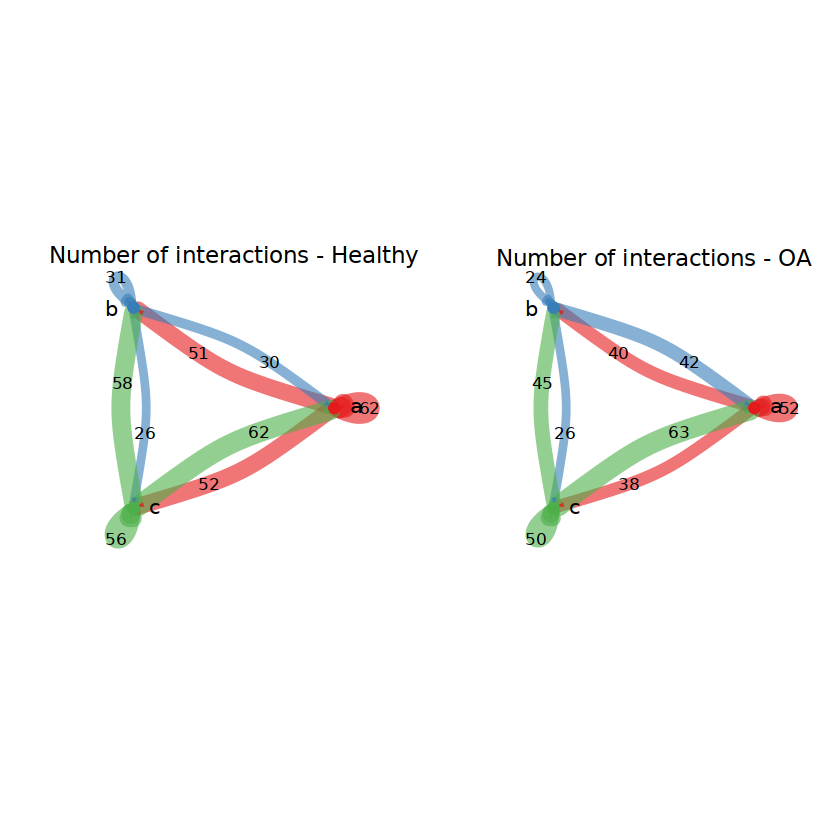

In [14]:
weight.max <- getMaxWeight(object.list, slot.name = c("idents", "net", "net"), attribute = c("idents","count", "count.merged"))
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_circle(object.list[[i]]@net$count.merged, weight.scale = T, label.edge= T, edge.weight.max = weight.max[3], edge.width.max = 12, title.name = paste0("Number of interactions - ", names(object.list)[i]))
}

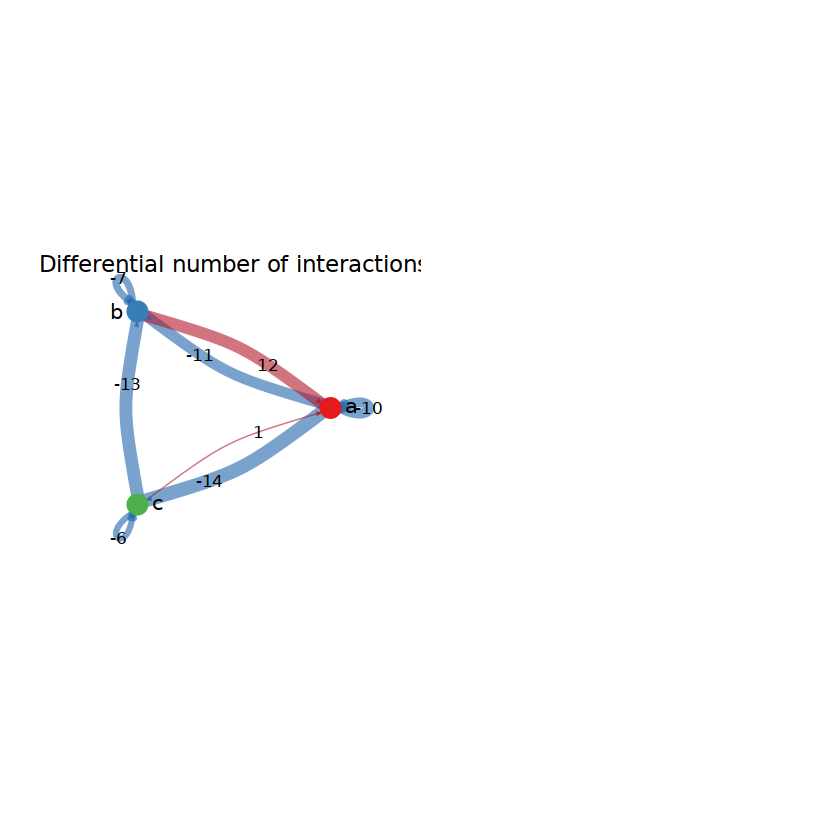

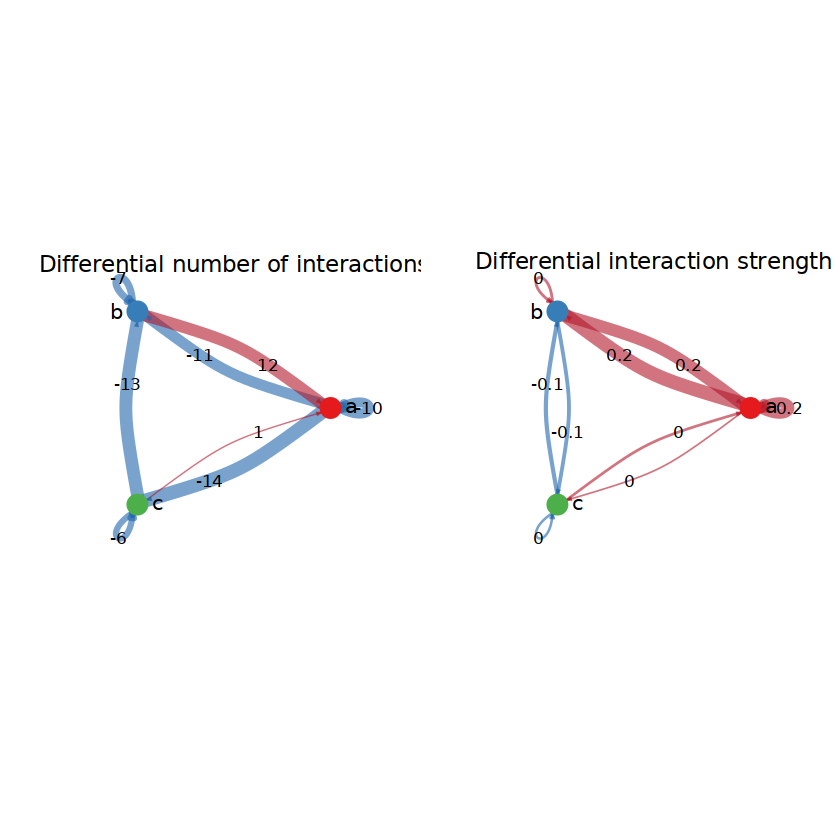

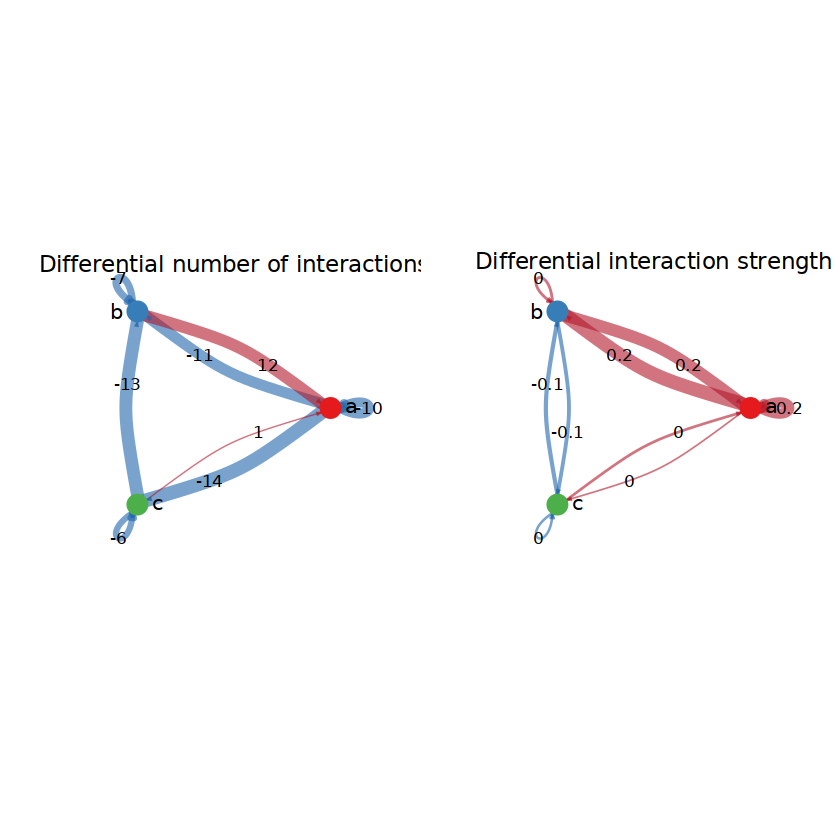

In [15]:
par(mfrow = c(1,2), xpd=TRUE)
netVisual_diffInteraction(cellchat, weight.scale = T, measure = "count.merged", label.edge = T)
netVisual_diffInteraction(cellchat, weight.scale = T, measure = "weight.merged", label.edge = T)

In [16]:
pdf('../figure2/sc.mye.cellchat3.pdf',height = 5,width = 10)
num.link <- sapply(object.list, function(x) {rowSums(x@net$count) + colSums(x@net$count)-diag(x@net$count)})
weight.MinMax <- c(min(num.link), max(num.link)) # control the dot size in the different datasets
gg <- list()
for (i in 1:length(object.list)) {
  gg[[i]] <- netAnalysis_signalingRole_scatter(object.list[[i]], title = names(object.list)[i], weight.MinMax = weight.MinMax)
}
#> Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
#> Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
patchwork::wrap_plots(plots = gg)
dev.off()

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



png 
  2

Compute signaling network similarity for datasets 1 2 
Manifold learning of the signaling networks for datasets 1 2 
Classification learning of the signaling networks for datasets 1 2 
2D visualization of signaling networks from datasets 1 2 


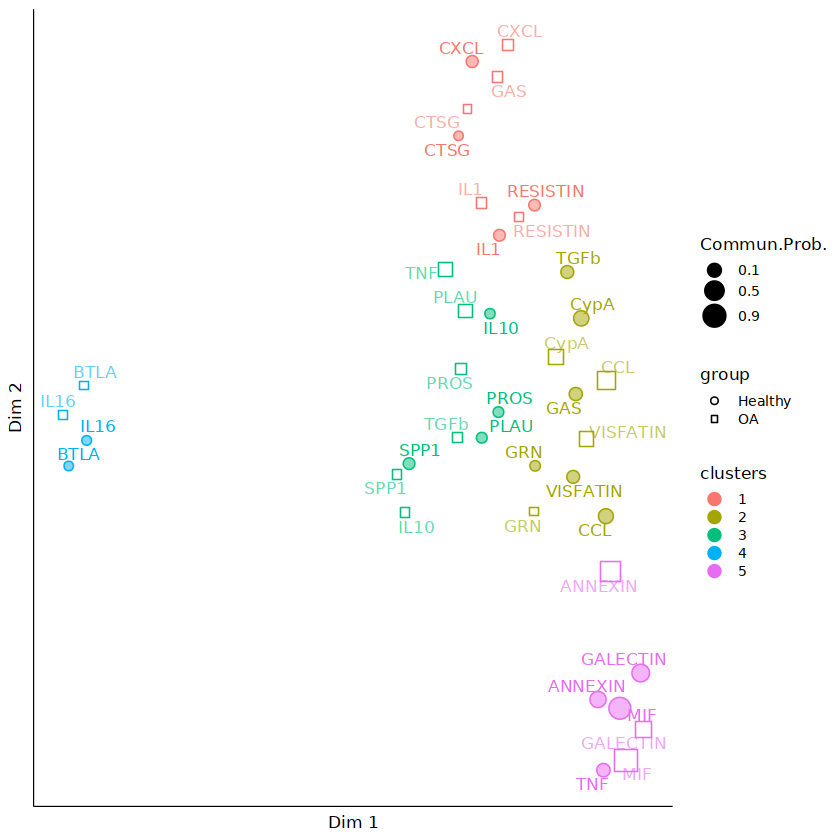

In [17]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "functional")
#> Compute signaling network similarity for datasets 1 2
cellchat <- netEmbedding(cellchat, type = "functional")
#> Manifold learning of the signaling networks for datasets 1 2
cellchat <- netClustering(cellchat, type = "functional",do.parallel = FALSE)
#> Classification learning of the signaling networks for datasets 1 2
# Visualization in 2D-space
netVisual_embeddingPairwise(cellchat, type = "functional", label.size = 3.5)
#> 2D visualization of signaling networks from datasets 1 2

In [18]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "structural")
#> Compute signaling network similarity for datasets 1 2
cellchat <- netEmbedding(cellchat, type = "structural")
#> Manifold learning of the signaling networks for datasets 1 2


Compute signaling network similarity for datasets 1 2 
Manifold learning of the signaling networks for datasets 1 2 


Classification learning of the signaling networks for datasets 1 2 
2D visualization of signaling networks from datasets 1 2 


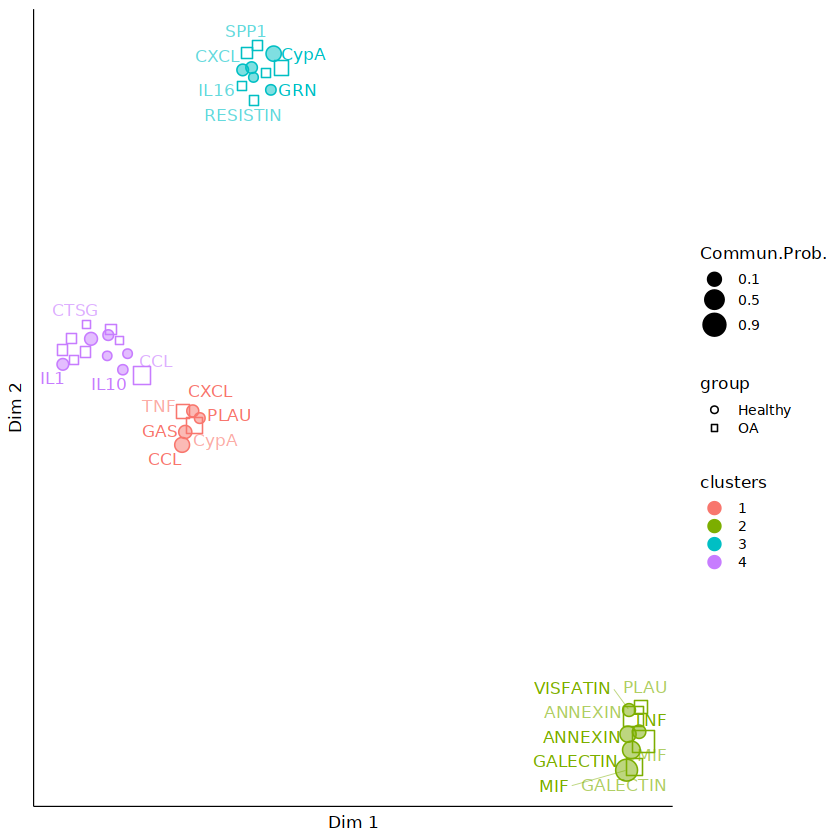

In [19]:
cellchat <- netClustering(cellchat, type = "structural",do.parallel = FALSE)
#> Classification learning of the signaling networks for datasets 1 2
# Visualization in 2D-space
netVisual_embeddingPairwise(cellchat, type = "structural", label.size = 3.5)
#> 2D visualization of signaling networks from datasets 1 2

2D visualization of signaling networks from datasets 1 2 


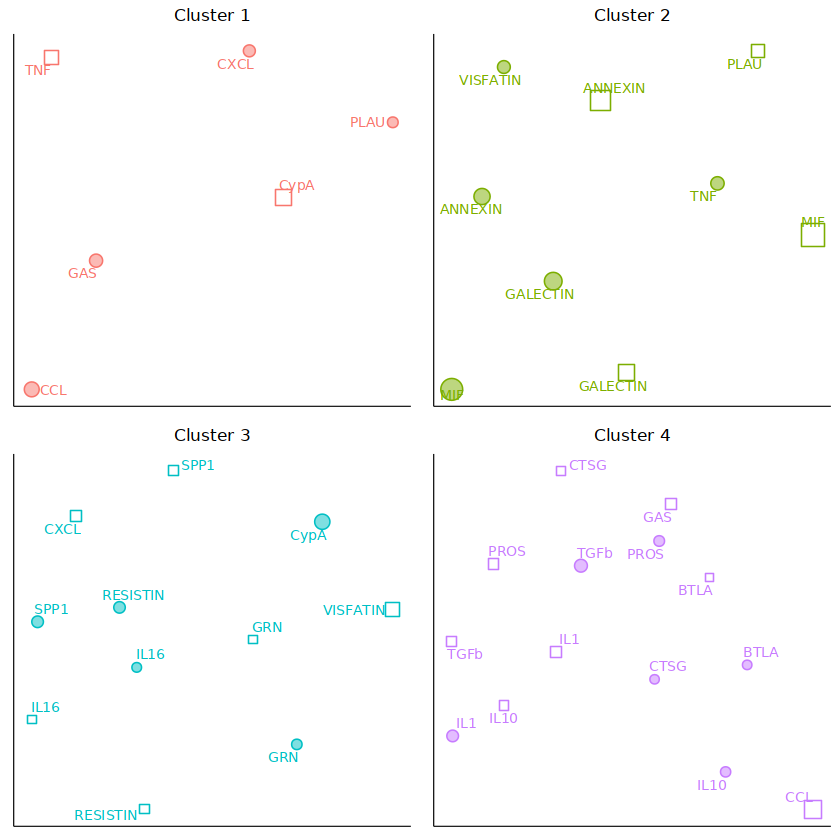

In [20]:
netVisual_embeddingPairwiseZoomIn(cellchat, type = "structural", nCol = 2)
#> 2D visualization of signaling networks from datasets 1 2

In [21]:
pdf('../figure2/sc.mye.cellchat4.pdf',height = 5,width = 10)
gg1 <- rankNet(cellchat, mode = "comparison", stacked = T, do.stat = TRUE)
gg2 <- rankNet(cellchat, mode = "comparison", stacked = F, do.stat = TRUE)
gg1 + gg2
dev.off()

png 
  2

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




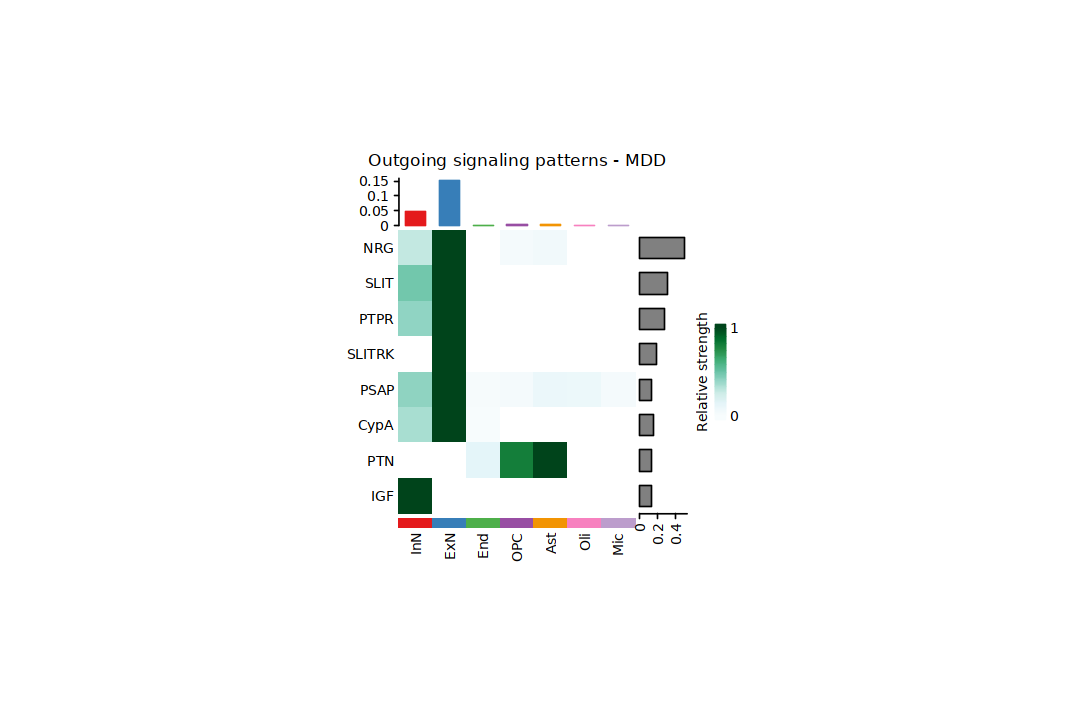

In [40]:
library(ComplexHeatmap)
#> Loading required package: grid
#> ========================================
#> ComplexHeatmap version 2.7.1.1010
#> Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
#> Github page: https://github.com/jokergoo/ComplexHeatmap
#> Documentation: http://jokergoo.github.io/ComplexHeatmap-reference
#> 
#> If you use it in published research, please cite:
#> Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
#>   genomic data. Bioinformatics 2016.
#> 
#> This message can be suppressed by:
#>   suppressPackageStartupMessages(library(ComplexHeatmap))
#> ========================================
i = 1
# combining all the identified signaling pathways from different datasets 
pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i+1], width = 5, height = 6)
ht1
ht2

In [41]:
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6, color.heatmap = "OrRd")
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "all", signaling = pathway.union, title = names(object.list)[i+1], width = 5, height = 6, color.heatmap = "OrRd")

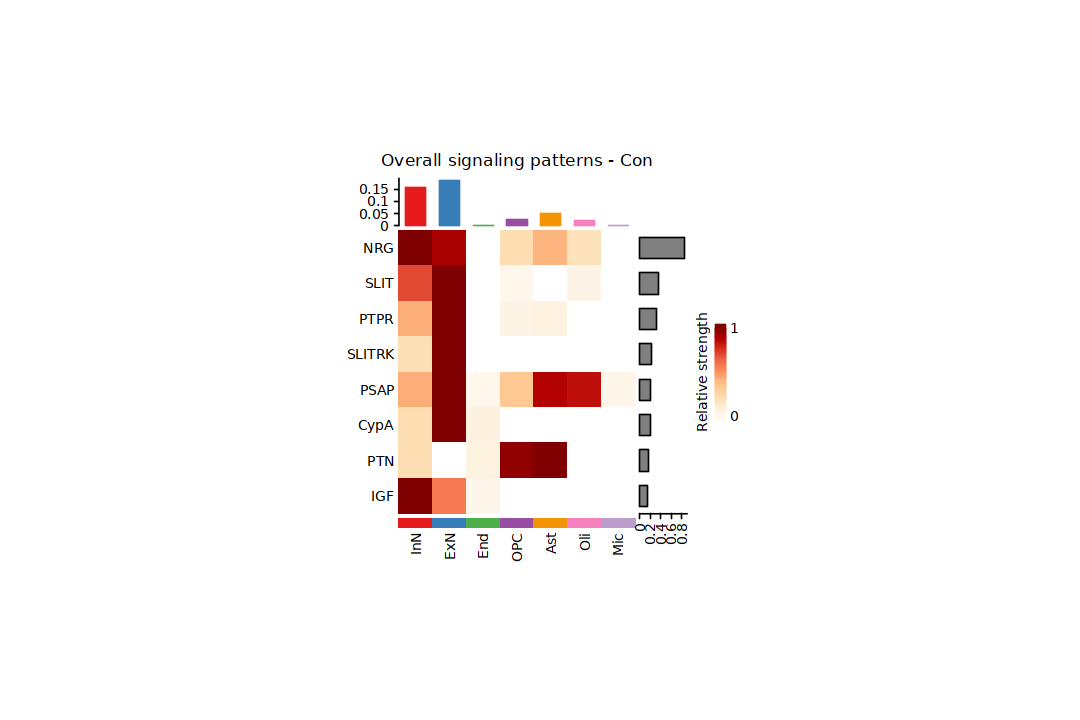

In [42]:
ht1

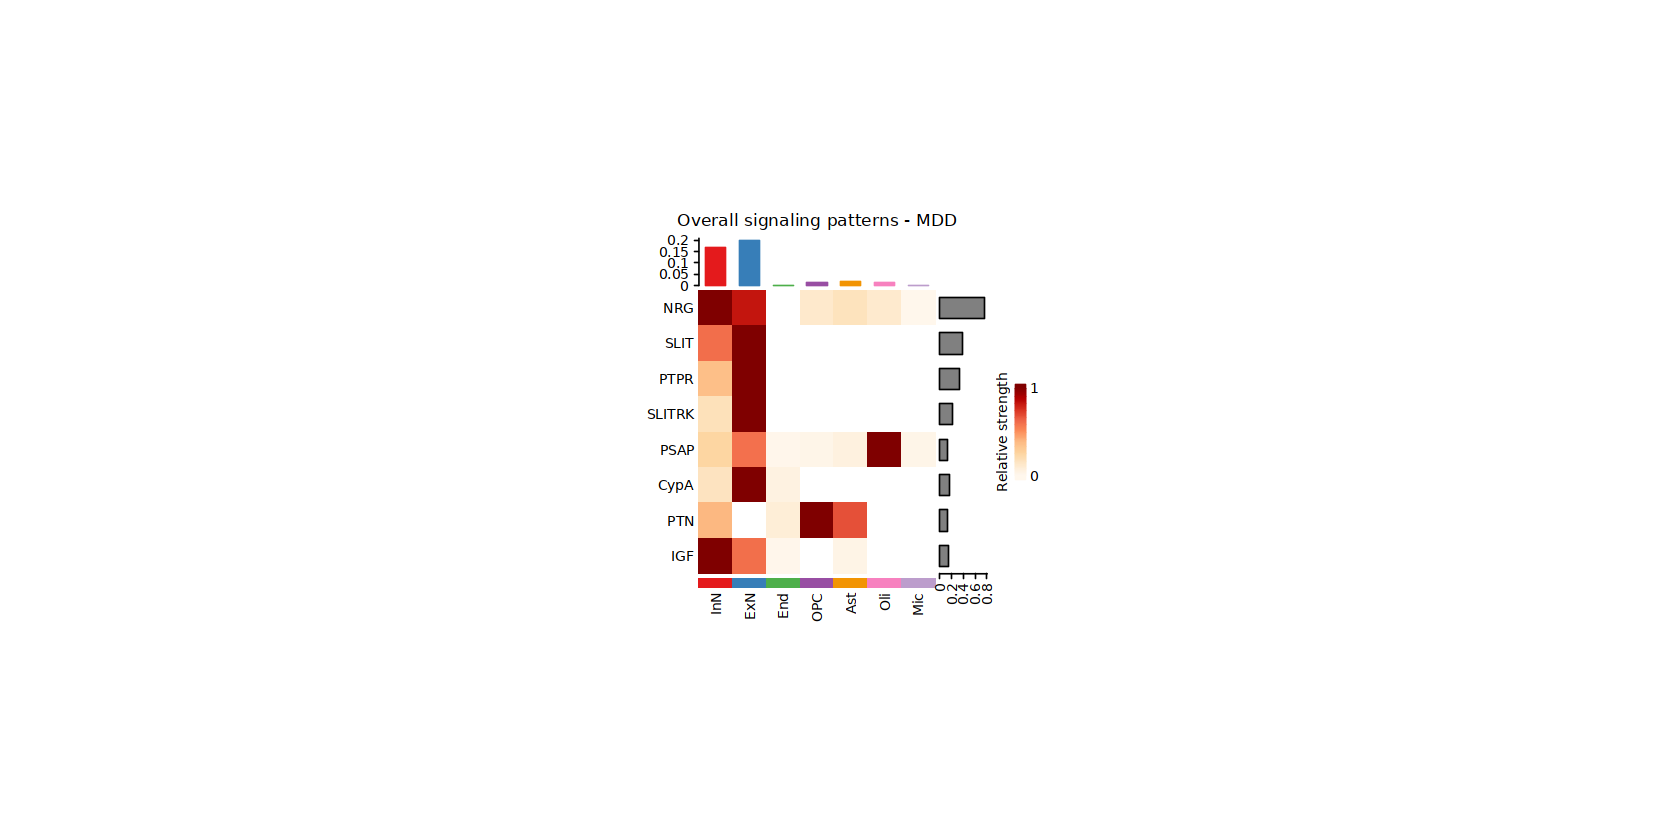

In [60]:
ht2

In [33]:
options(repr.plot.width = 13,repr.plot.height = 5)

In [50]:
p = netVisual_bubble(cellchat, font.size = 16, thresh = 0.01, comparison = c(1,2),  angle.x = 45,#targets.use = 2,
                     max.dataset = 2, title.name = "Increased signaling in MDD",remove.isolate = TRUE)
#> Comparing communications on a merged object

Comparing communications on a merged object 




In [51]:
options(repr.plot.width = 10,repr.plot.height =7 )

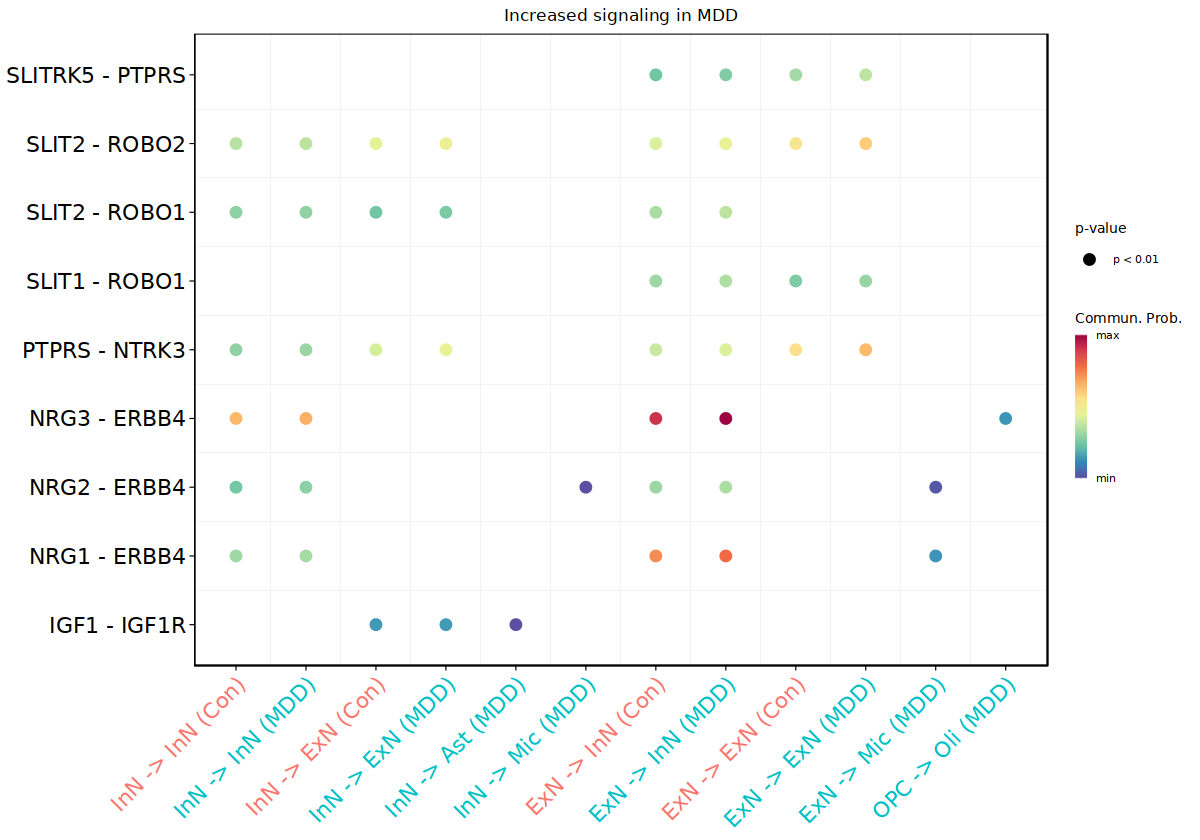

In [52]:
p

In [53]:
pdf('./sc.mye.cellchat6.pdf',height = 7,width = 10)
print(p)
dev.off()

png 
  2

In [57]:
options(repr.plot.width = 14,repr.plot.height = 7)

In [58]:
p = netVisual_bubble(cellchat,  font.size = 16, comparison = c(1, 2),max.dataset = 1, 
                     title.name = "Deseased signaling in MDD",
                  remove.isolate = TRUE, angle.x = 45)

Comparing communications on a merged object 




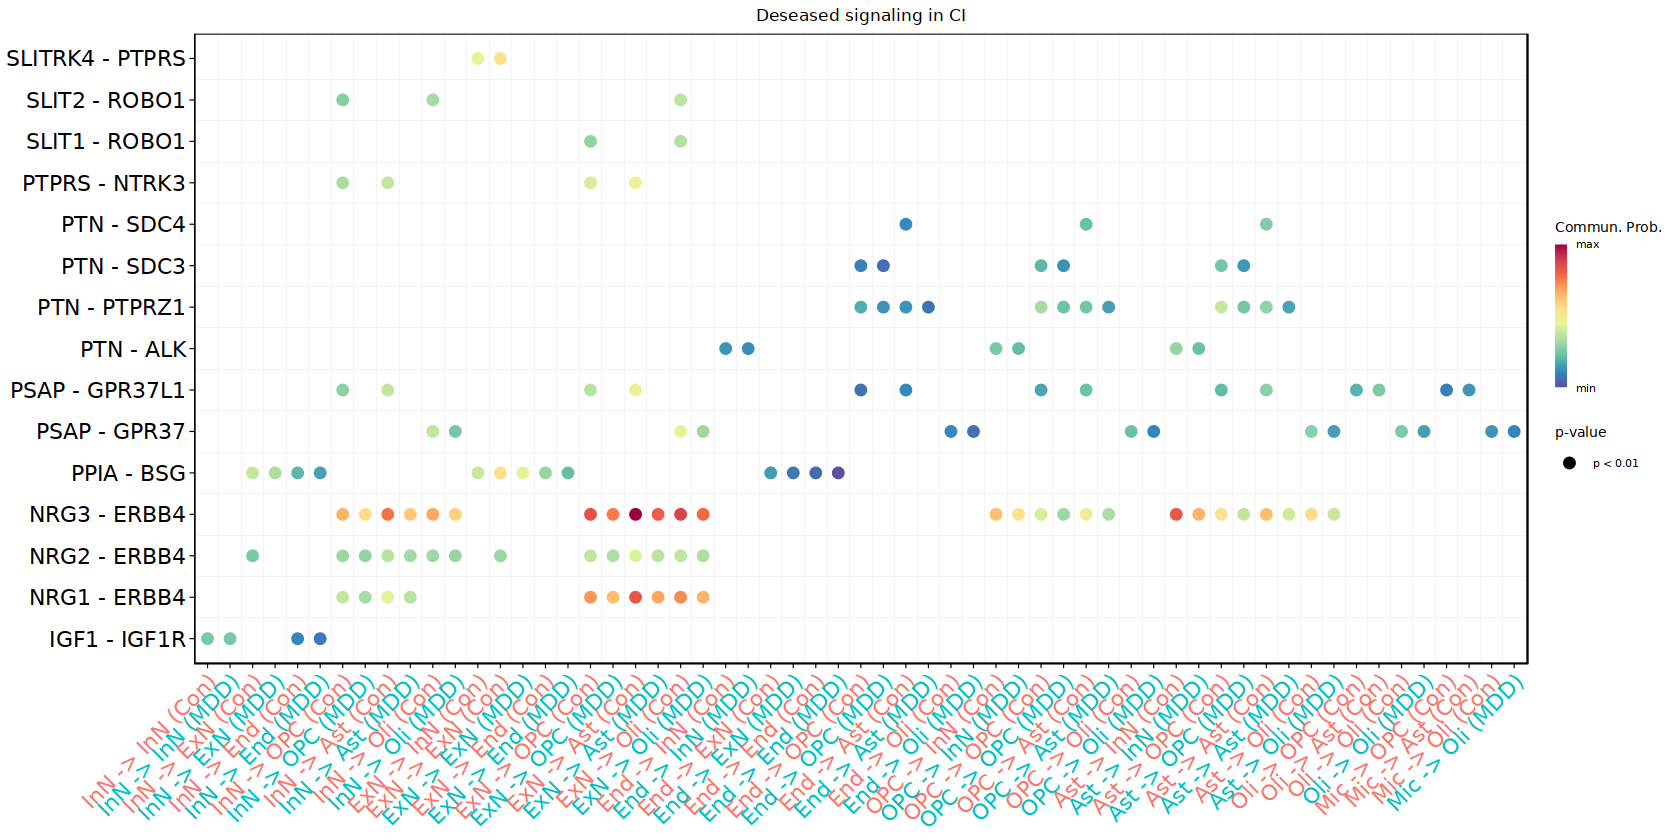

In [59]:
p

In [35]:
pdf('./sc.mye.cellchat7.pdf',height = 7,width = 10)
print(p)
dev.off()

png 
  2

In [36]:
p = netVisual_bubble(cellchat, font.size = 16, thresh = 0.01, comparison = c(1,2),  angle.x = 45,sources.use  = 6,
                     max.dataset = 2, title.name = "Increased signaling in CI")

Comparing communications on a merged object 




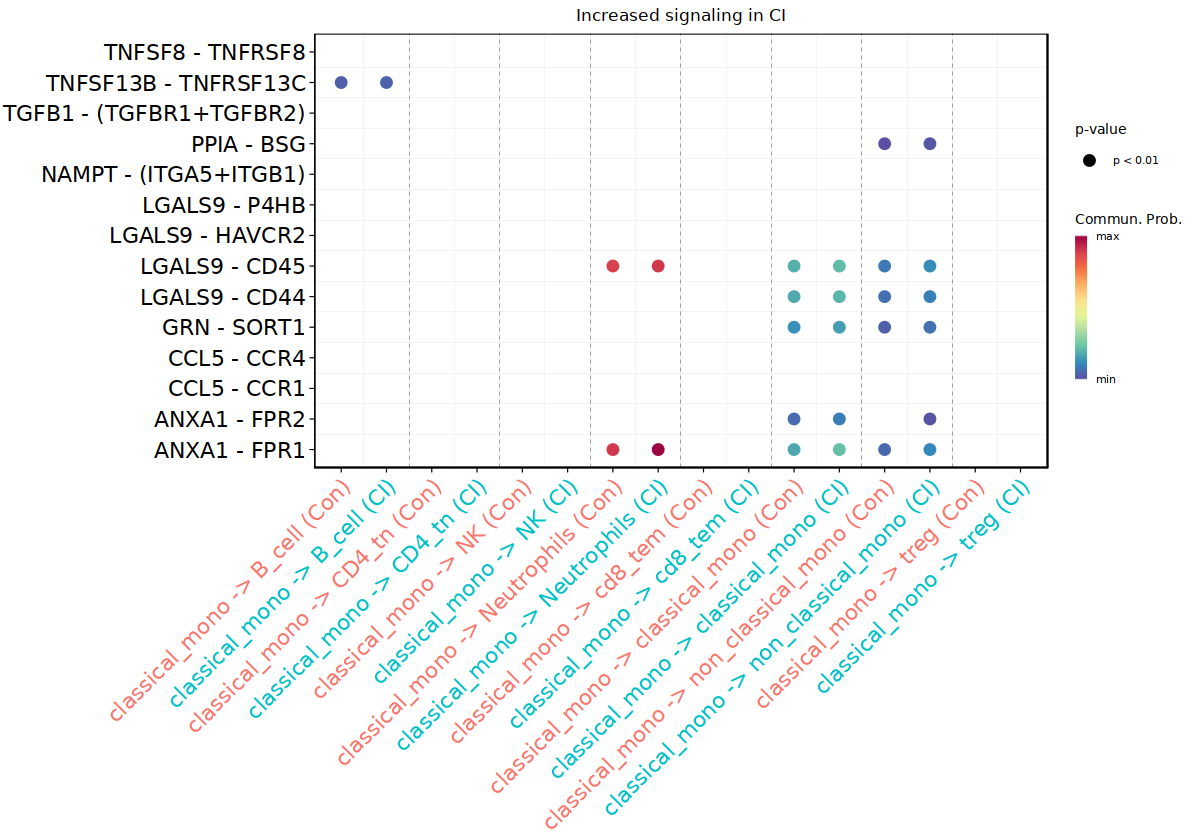

In [37]:
p

In [38]:
p = netVisual_bubble(cellchat,  sources.use  = c(6), font.size = 16, comparison = c(1, 2),max.dataset = 1, 
                     title.name = "Deseased signaling in CI",
                  remove.isolate = FALSE, angle.x = 45)

Comparing communications on a merged object 




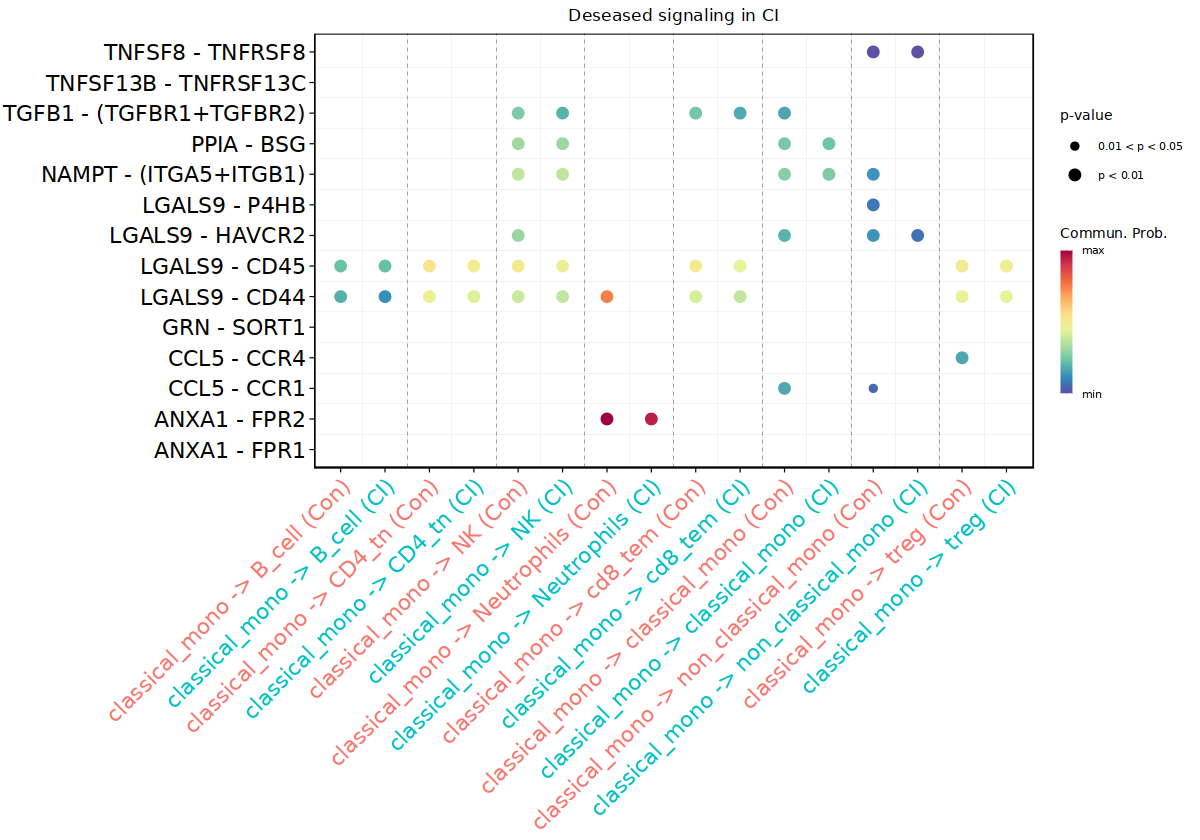

In [39]:
p

In [41]:
pos.dataset = "CI"
# define a char name used for storing the results of differential expression analysis
features.name = pos.dataset
# perform differential expression analysis
cellchat <- identifyOverExpressedGenes(cellchat, group.dataset = "datasets", pos.dataset = pos.dataset, features.name = features.name, only.pos = FALSE, thresh.pc = 0.1, thresh.fc = 0.1, thresh.p = 1)
#> Use the joint cell labels from the merged CellChat object
# map the results of differential expression analysis onto the inferred cell-cell communications to easily manage/subset the ligand-receptor pairs of interest
net <- netMappingDEG(cellchat, features.name = features.name)
# extract the ligand-receptor pairs with upregulated ligands in LS
net.up <- subsetCommunication(cellchat, net = net, datasets = "CI",ligand.logFC = 0.2, receptor.logFC = NULL)
# extract the ligand-receptor pairs with upregulated ligands and upregulated recetptors in NL, i.e.,downregulated in LS
net.down <- subsetCommunication(cellchat, net = net, datasets = "Con",ligand.logFC = -0.1, receptor.logFC = -0.1)

Use the joint cell labels from the merged CellChat object



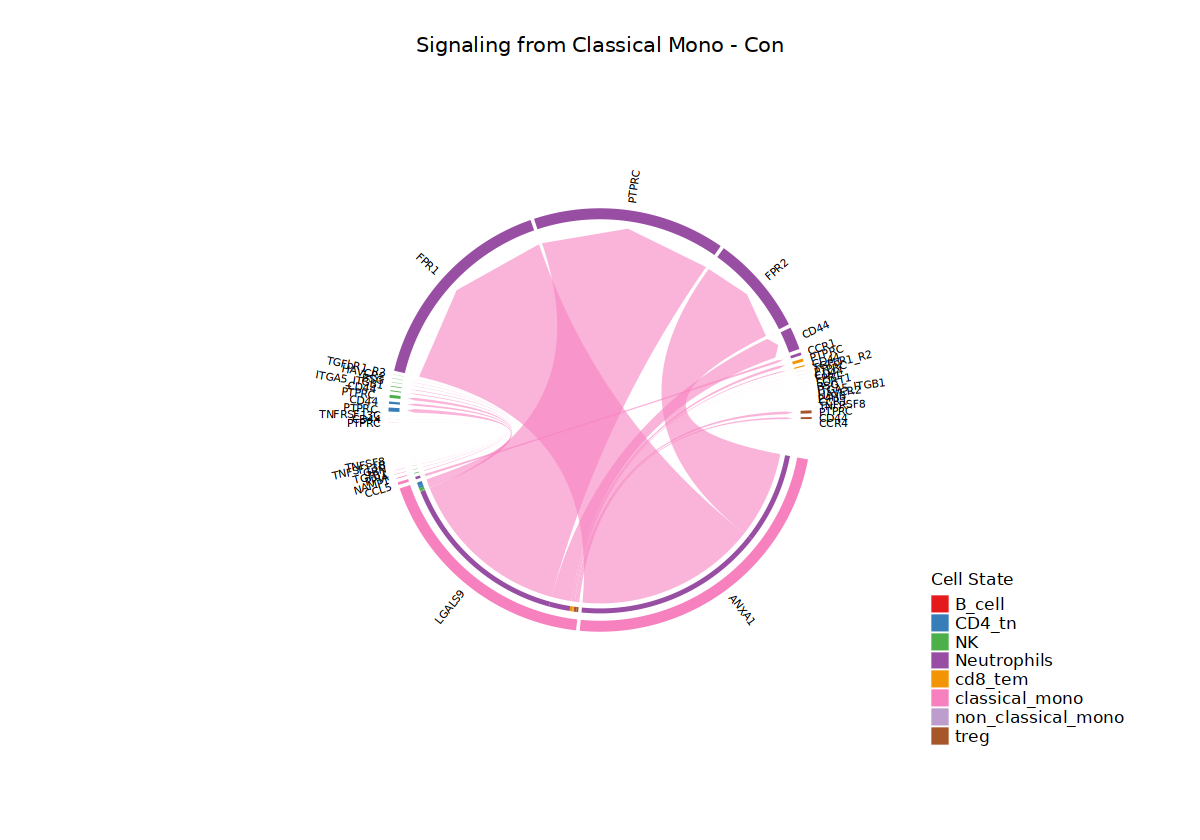

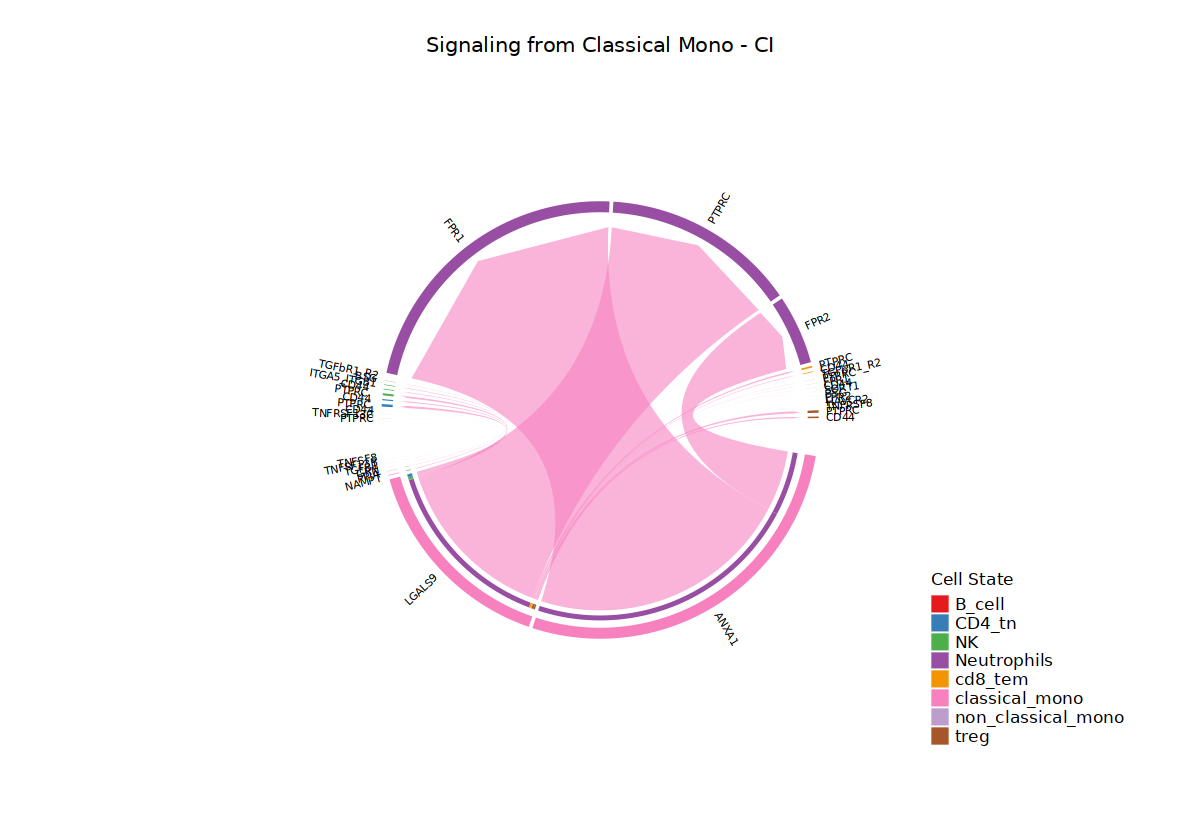

In [47]:
#par(mfrow = c(1, 2), xpd=TRUE)
# compare all the interactions sending from Inflam.FIB to DC cells
for (i in 1:length(object.list)) {
  netVisual_chord_gene(object.list[[i]], sources.use = 6, targets.use = c(1:5,7,8), lab.cex = 0.5,
                       title.name = paste0("Signaling from Classical Mono - ", names(object.list)[i]))
}

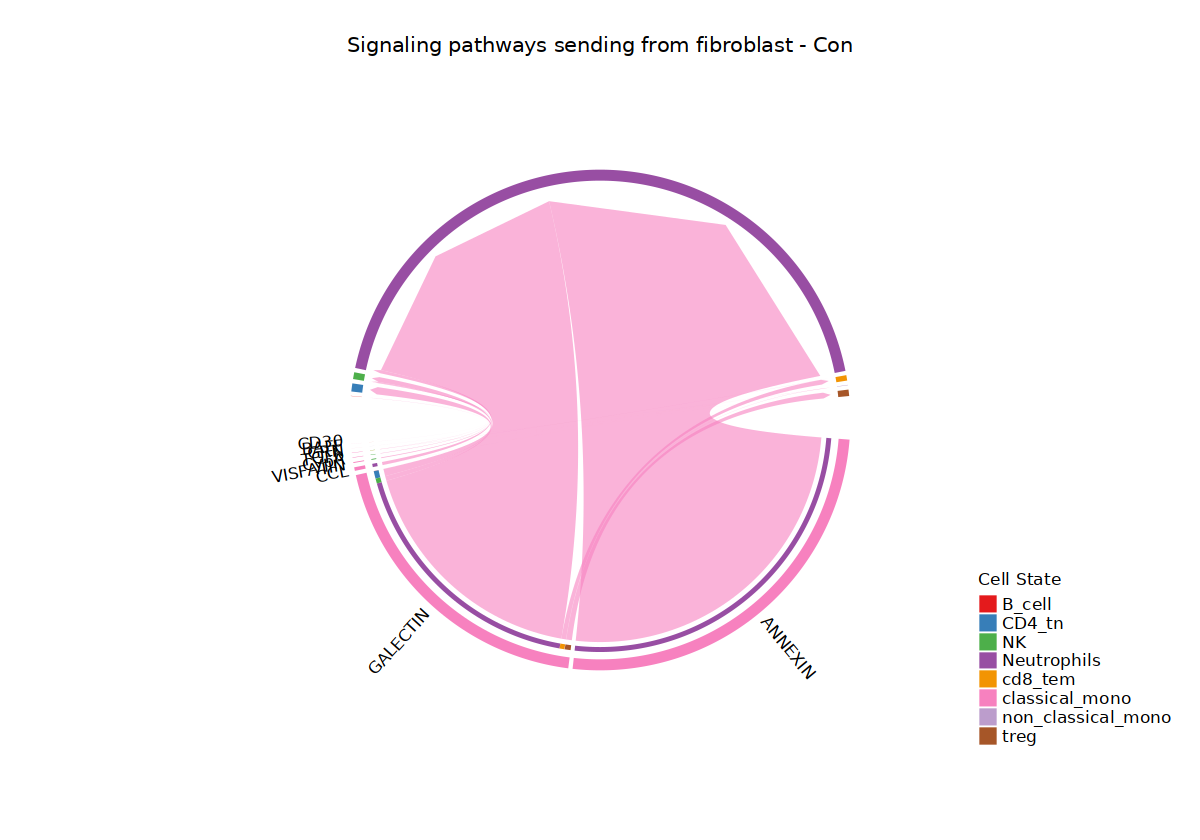

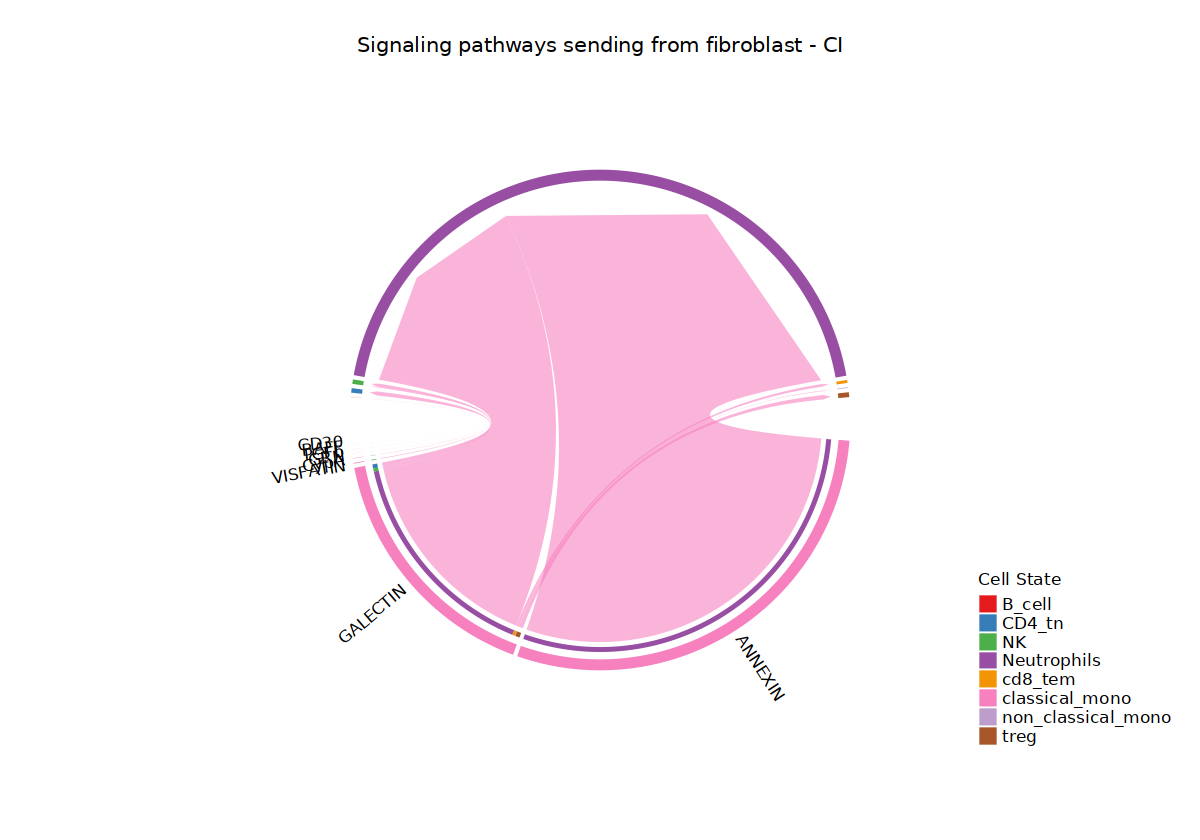

In [48]:
# show all the significant signaling pathways from fibroblast to immune cells
#par(mfrow = c(1, 2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_chord_gene(object.list[[i]], sources.use = 6, targets.use = c(1:5,7,8),
                       slot.name = "netP", title.name = paste0("Signaling pathways sending from Classical Mono - ", names(object.list)[i]), 
                       legend.pos.x = 10)
}
#> Note: The second link end is drawn out of sector ' '.
#> Note: The first link end is drawn out of sector 'MIF'.
#> Note: The second link end is drawn out of sector ' '.
#> Note: The first link end is drawn out of sector 'CXCL '.

In [38]:
library(ComplexHeatmap)

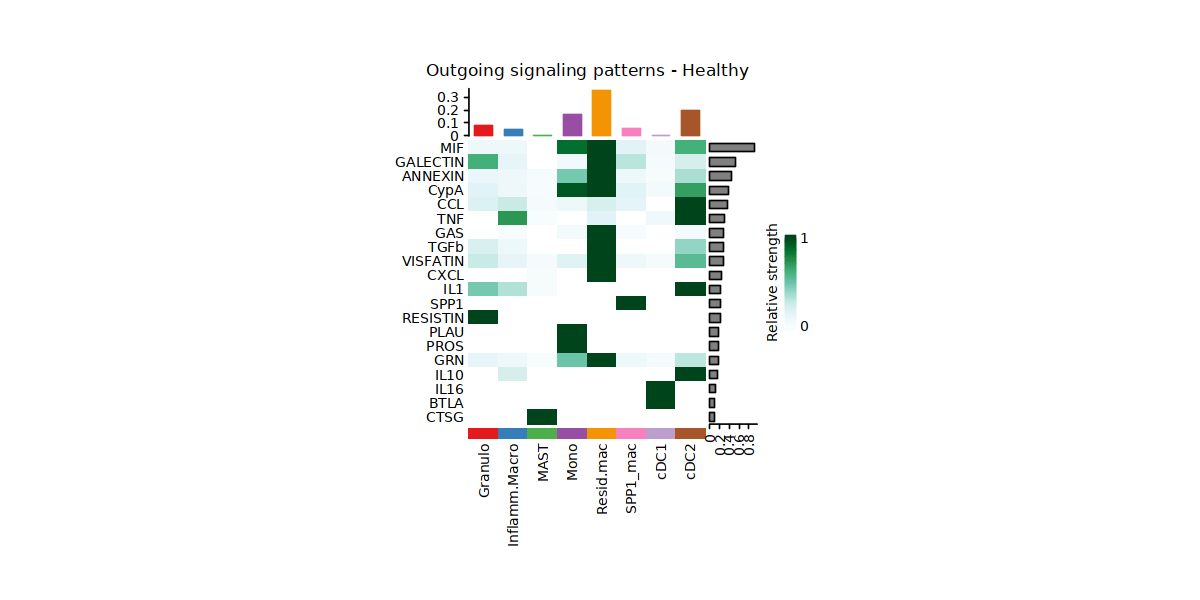

In [39]:
pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i+1], width = 5, height = 6)
ht1

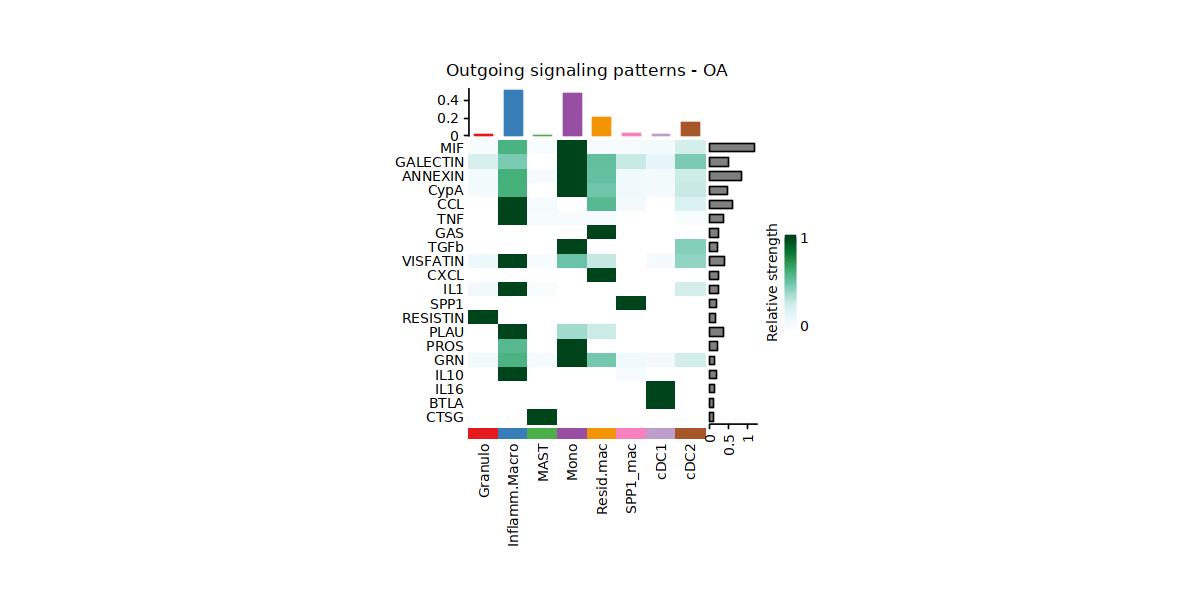

In [40]:
ht2

In [41]:
pathways.show <- c("SPP1") 
par(mfrow = c(1,2), xpd=TRUE)
ht <- list()
for (i in 1:length(object.list)) {
  ht[[i]] <- netVisual_heatmap(object.list[[i]], signaling = pathways.show, color.heatmap = "Reds",title.name = paste(pathways.show, "signaling ",names(object.list)[i]))
}

Do heatmap based on a single object 


Do heatmap based on a single object 




In [42]:
pdf('../figure2/sc.mye.cellchat5-healthy.pdf',height = 5,width = 5)
ht[[1]]
dev.off()

png 
  2

In [43]:
pdf('../figure2/sc.mye.cellchat5-OA.pdf',height = 5,width = 5)
ht[[2]]
dev.off()

png 
  2

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


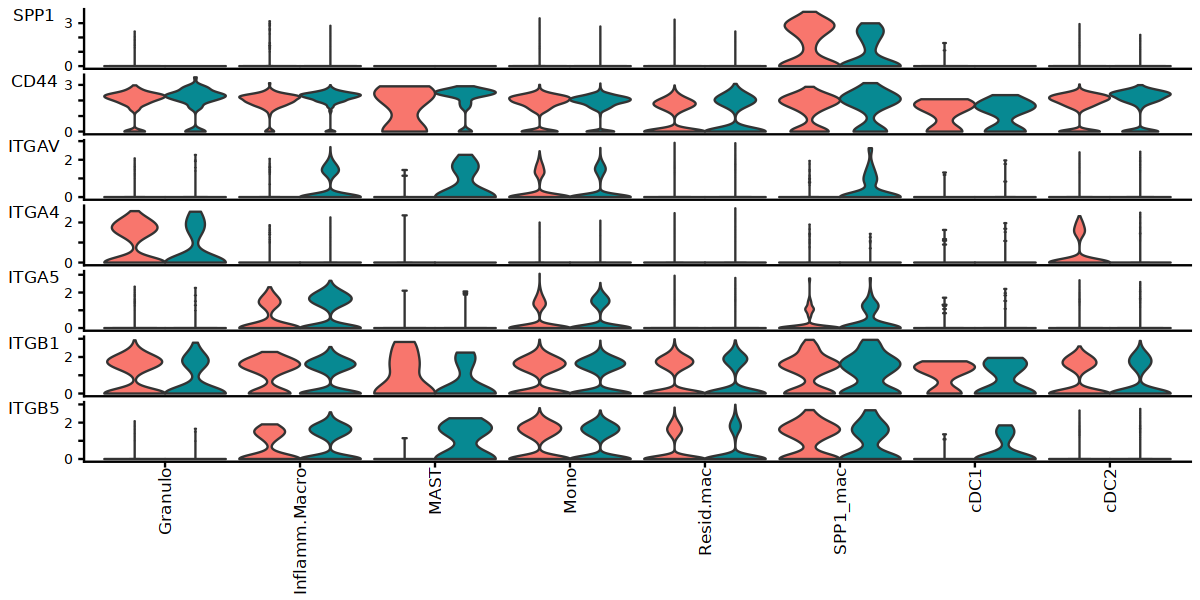

In [44]:
cellchat@meta$datasets = factor(cellchat@meta$datasets, levels = c("Healthy", "OA")) # set factor level
plotGeneExpression(cellchat, signaling = "SPP1", split.by = "datasets", colors.ggplot = T)

In [45]:
ggsave('../figure2/sc.mye.cellchat6.pdf',height = 8,width = 8)

###  分别展示上下调的受配体

In [28]:
options(repr.plot.height = 7)

In [29]:
pathways.show

ERROR: Error in eval(expr, envir, enclos): object 'pathways.show' not found


In [30]:
pairLR.use = cellchat@netP$OA$pathways

In [59]:
pairLR.use <- cellchat@netP$OA$pathways

In [65]:
pairLR.use = pairLR.use[-2]

Comparing communications on a merged object 




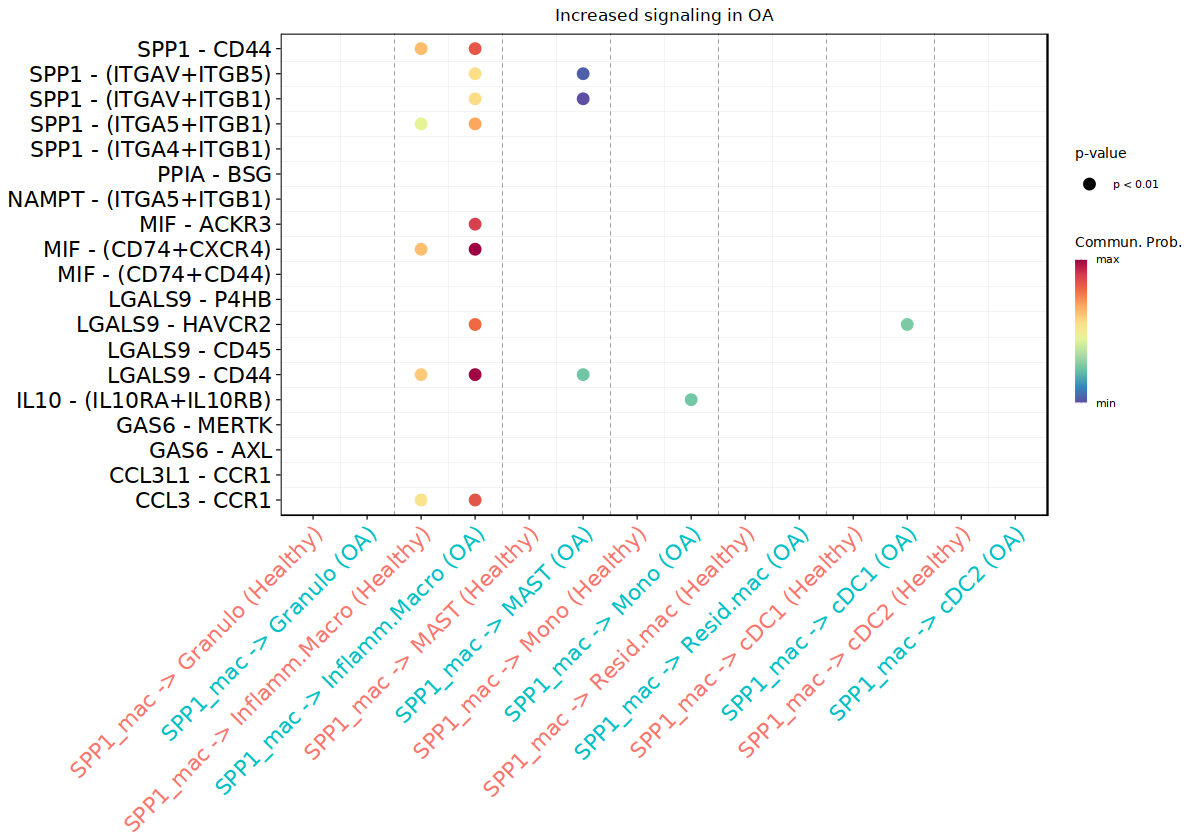

In [68]:
netVisual_bubble(cellchat, sources.use = c(6),font.size = 16, thresh = 0.01,max.dataset = 2, 
                 signaling  = pairLR.use,title.name = "Increased signaling in OA",
                 targets.use = c(1,2,3,4,5,7,8), comparison = c(1,2),  angle.x = 45)

In [27]:
netVisual_bubble(cellchat, sources.use = c(6),font.size = 16, thresh = 0.01,max.dataset = 1, 
                 signaling  = pairLR.use,title.name = "Decreased signaling in OA",
                 targets.use = c(1,2,3,4,5,7,8), comparison = c(1,2),  angle.x = 45)

Comparing communications on a merged object 




ERROR: Error in subsetCommunication(object, slot.name = "net", sources.use = sources.use, : object 'pairLR.use' not found
